**Name : Abdul Basit**

**Reg_No : GCS2309**

**Quantum Computing [Final Exam]**

## Q1. (b)

In [ ]:
!pip install -q qiskit
!pip install -q qiskit-aer
!pip install -q pylatexenc
!pip install -q qiskit-ibmq-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 5.9 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import Aer, execute, BasicAer
import numpy as np
from numpy import sqrt

### Y Gate Circuit

In [ ]:
# Function to Draw Circuit
def DC(circuit):
  circuit.barrier()
  return circuit.draw('mpl')

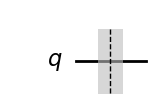

In [ ]:
# Creating the A CIRCUIT to see normal behaviour of Y gate
YC = QuantumCircuit(1)
DC(YC)

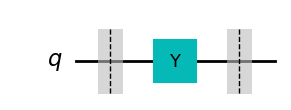

In [ ]:
# Applying Y gate
YC.y(0)
DC(YC)

Ploting on Bloch Multi vector


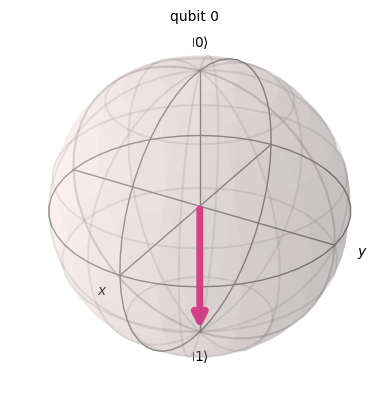

In [ ]:
backend = Aer.get_backend('statevector_simulator')
backend_results_state = execute(YC,backend).result().get_statevector()
print("Ploting on Bloch Multi vector")
plot_bloch_multivector(backend_results_state)

Beckend State Result


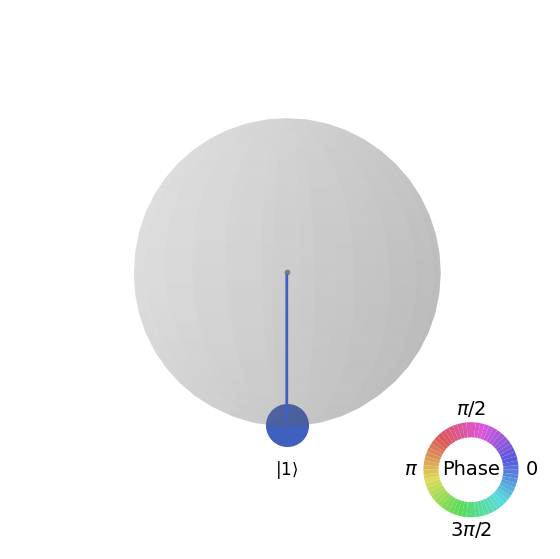

In [ ]:
print("Beckend State Result")
plot_state_qsphere(backend_results_state)

Printing Histogram


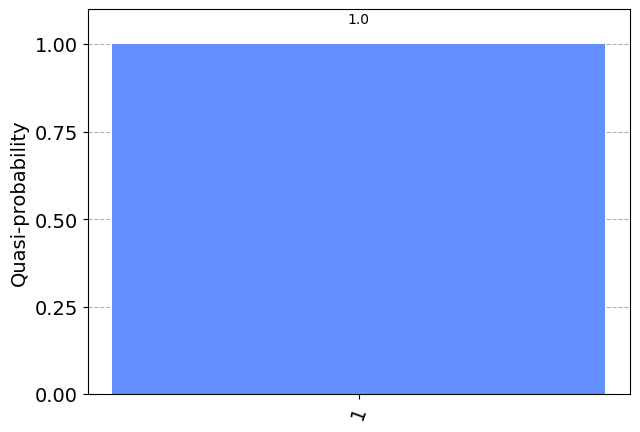

In [ ]:
backend_results_count = execute(YC,backend,shots=1024).result().get_counts()
print("Printing Histogram")
plot_histogram(backend_results_count)

### Combitional Gates for Y using S and H gates
After doing multiple expeeriments I have reached to find a equivalent gate of Y in combinations of S and H

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


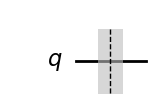

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_bloch_multivector
SHC = QuantumCircuit(1) #SH Circuit
DC(SHC)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


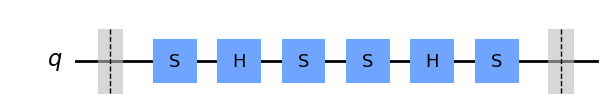

In [ ]:
# The equivalent of Y is
# Y = SHSSHS
# So implementing Circuits
SHC.s(0)
SHC.h(0)
SHC.s(0)
SHC.s(0)
SHC.h(0)
SHC.s(0)

DC(SHC)

Ploting on Bloch Multi vector


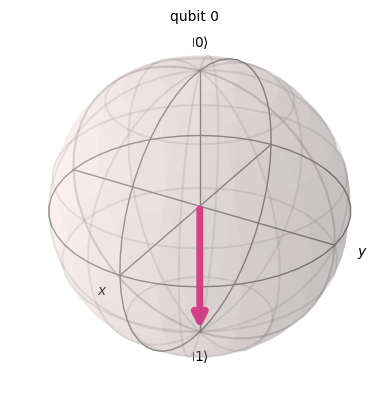

In [ ]:
backend = Aer.get_backend('statevector_simulator')
backend_results_state = execute(SHC,backend).result().get_statevector()
print("Ploting on Bloch Multi vector")
plot_bloch_multivector(backend_results_state)

Beckend State Result


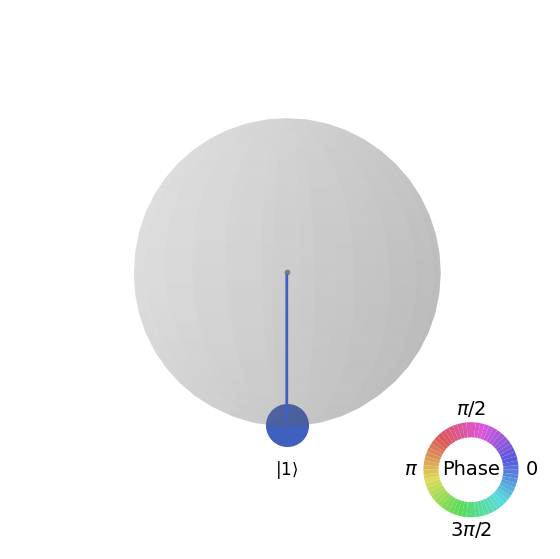

In [ ]:
print("Beckend State Result")
plot_state_qsphere(backend_results_state)

Printing Histogram


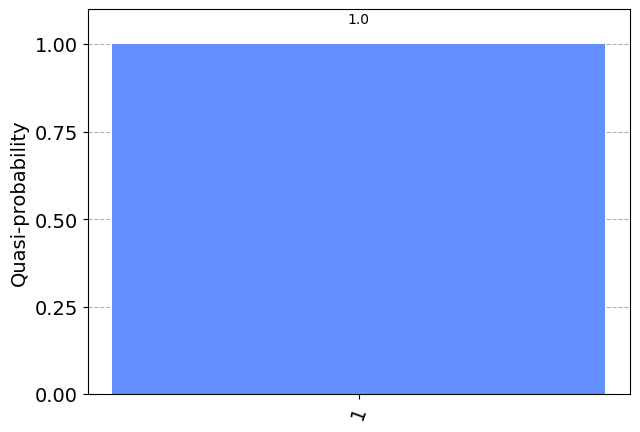

In [ ]:
backend_results_count = execute(SHC,backend,shots=1024).result().get_counts()
print("Printing Histogram")
plot_histogram(backend_results_count)

Both Y and SH-Combinational gate gives same output

## Q3. (b) Groover's Algorithm for n Searches

In [ ]:
# Preparing all inputs in Super position State
def superposition(qc, qubits):
    """Apply a Hadamard gate to all qubits to create an equal superposition"""
    for q in qubits:
        qc.h(q)
    return qc

In [ ]:
## Function for Phase oracle
def grover_oracle(qc, target_qubit, oracle_qubits):
    qc.x(target_qubit)
    qc.h(target_qubit)
    qc.mct(oracle_qubits, target_qubit)  # Toffoli gate
    qc.h(target_qubit)
    qc.x(target_qubit)
    return qc

In [ ]:
## Function for Diffuser
def grover_diffusion(qc, qubits):
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # Multi-Controlled Toffoli gate
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)
    return qc

In [ ]:
## Groover's Main Function
def grover_algorithm(n, oracle_qubits, num_iterations):
    # Create quantum circuit
    qc = QuantumCircuit(n + 1, n)
    # Initialize qubits
    qc = superposition(qc, range(n + 1))
    # Grover iterations
    for _ in range(num_iterations):
        qc = grover_oracle(qc, n, oracle_qubits)
        qc = grover_diffusion(qc, range(n))
    # Measure the first n qubits
    qc.measure(range(n), range(n))
    return qc

In [ ]:
qubits = int(input("Enter the number of qubits to genratate Phase Oracle: "))
targetbit = int(input("Enter the target bit "))
num_iterations = int(input("Enter number of iterations "))
# Converting target bits in in Binary
oracle_qubits = [i for i in range(qubits) if (targetbit & (1 << i)) != 0]

Enter the number of qubits to genratate Phase Oracle: 4
Enter the target bit 12
Enter number of iterations 4


In [ ]:
# Create the Grover's Algorithm circuit
grover_circuit = grover_algorithm(qubits, oracle_qubits, num_iterations)

<ipython-input-48-c8707e177aa3>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(oracle_qubits, target_qubit)  # Toffoli gate
<ipython-input-45-c632346d1c55>:25: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits[:-1], qubits[-1])  # Multi-Controlled Toffoli gate


TypeError: unsupported operand type(s) for +: 'range' and 'list'

In [ ]:
backend = Aer.get_backend('statevector_simulator')
backend_results_state = execute(SHC,backend).result().get_statevector()
print("Ploting on Bloch Multi vector")
plot_bloch_multivector(backend_results_state)

In [ ]:
print("Beckend State Result")
plot_state_qsphere(backend_results_state)

In [ ]:
backend_results_count = execute(SHC,backend,shots=1024).result().get_counts()
print("Printing Histogram")
plot_histogram(backend_results_count)

## Q6. Quantum Fourirer Transform

source : https://github.com/paramrathour/Quantum-Computing

#### Defining Major Functions

In [ ]:
# Function for SWap Regisers
def Qswap(circuit,registers):
  for q in range(registers//2):  # Iterating a loop to swap values of qubits
    circuit.swap(q, registers-q-1) ## It will swap q value with n-1 qubit
    return circuit  ## return Circuit

In [ ]:
## Function for Q Rotations
def Qrotations(circuit, registers):
    if registers == 0:   ## Checking the conditions if number of qubit are zero
        return circuit
    registers -= 1  # Subtracting 1 values from the qubits values as we will apply n-1 rotations
    circuit.h(registers)
    for qubit in range(registers):
        circuit.cp(np.pi/2**(registers-qubit), qubit, registers)  ## Applyying rotations iterativly between all n-1 qubits
    Qrotations(circuit,registers)    ## Recuersivly call rotations function to apply after each hadmard is applied

In [ ]:
## Function for Qunatum Fourier Transform
def QFT(circuit, registers):
    """QFT on the first n qubits in circuit"""
    Qrotations(circuit, registers)   ## Calling the rotation Function to Apply rotations
    Qswap(circuit, registers) ## At Last Applying Swap Gate
    return circuit #Returning the Circuit

##### Implementing QFT for for qubits

Enter the number of qubit to generate QFT circuit : 5


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


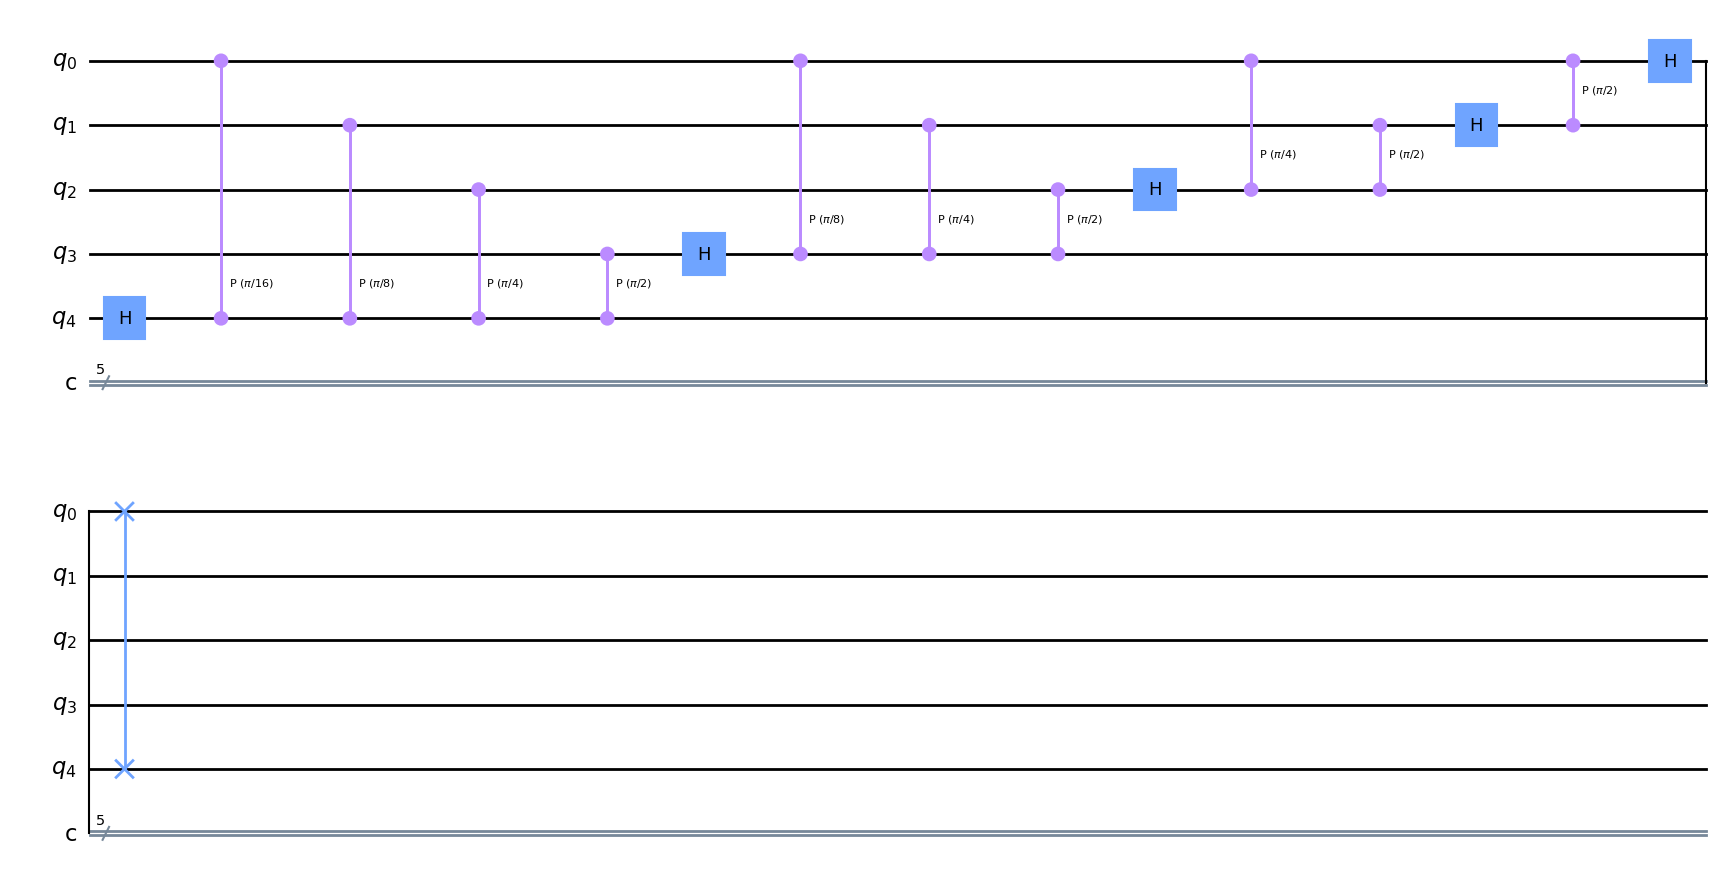

In [ ]:
## Getting user's input to generate QFT circuit
qubits = int(input("Enter the number of qubit to generate QFT circuit : "))
QC = QuantumCircuit(qubits,qubits)  ## Generating a Circuit based on input
QFT(QC,qubits)  ## Calling QFT to apply QFT operations on the Circuit
QC.draw(output = 'mpl') ## Drawing the Circuit

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

def initialize_s(qc, qubits):
    """Apply a Hadamard gate to all qubits to create an equal superposition"""
    for q in qubits:
        qc.h(q)
    return qc

def grover_oracle(qc, target_qubit, oracle_qubits):
    """Apply the Grover Oracle to mark the solution"""
    qc.x(target_qubit)
    qc.h(target_qubit)
    qc.mct(oracle_qubits, target_qubit)  # Multi-Controlled Toffoli gate
    qc.h(target_qubit)
    qc.x(target_qubit)
    return qc

def grover_diffusion(qc, qubits):
    """Apply the Grover Diffusion Operator"""
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[-1])
    qc.mct(qubits[:-1], qubits[-1])  # Multi-Controlled Toffoli gate
    qc.h(qubits[-1])
    qc.x(qubits)
    qc.h(qubits)
    return qc

def grover_algorithm(n, oracle_qubits, num_iterations):
    """Grover's Algorithm"""
    # Create quantum circuit
    qc = QuantumCircuit(n + 1, n)

    # Initialize qubits
    qc = initialize_s(qc, range(n + 1))

    # Grover iterations
    for _ in range(num_iterations):
        qc = grover_oracle(qc, n, oracle_qubits)
        qc = grover_diffusion(qc, range(n))

    # Measure the first n qubits
    qc.measure(range(n), range(n))

    return qc

# Set the number of qubits and the oracle solution
n = 3  # Number of qubits
oracle_solution = 5  # Binary representation of the solution

# Create the oracle qubits as a list of indices where the solution is 1
oracle_qubits = [i for i in range(n) if (oracle_solution & (1 << i)) != 0]

# Set the number of iterations (empirically, around pi/4 * sqrt(2^n) iterations are often effective)
num_iterations = 2

# Create the Grover's Algorithm circuit
grover_circuit = grover_algorithm(n, oracle_qubits, num_iterations)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()

# Display the results
counts = result.get_counts()
plot_histogram(counts)
